# Purpose

# Import packages

In [1]:
using Pkg
Pkg.status()

Status `D:\Utilizador HDD\Google Drive\02-Projects\Notebooks-Research\Statistics\Project.toml`
  [a93c6f00] DataFrames v1.6.1
⌃ [31c24e10] Distributions v0.25.108
  [38e38edf] GLM v1.9.0
  [09f84164] HypothesisTests v0.11.0
  [91a5bcdd] Plots v1.40.4
  [295af30f] Revise v3.5.15
  [f3b207a7] StatsPlots v0.15.7
Info Packages marked with ⌃ have new versions available and may be upgradable.


In [2]:
using Random
using Revise
using Distributions
using Plots.PlotMeasures
using StatsPlots
using DataFrames
using Printf
using GLM

In [3]:
includet("functions.jl")

# Generate data for the regressions

In [4]:
rng = Random.seed!(1)

TaskLocalRNG()

In [5]:
n_total = 20

data_growth = DataFrame(; age=[13:(n_total/2+12); 13:(n_total/2+12)],
                           sex=repeat(["male", "female"], inner=Int(n_total/2)),
                           weight=[range(100, 155; length=Int(n_total/2)); range(100, 125; length=Int(n_total/2))] .+ 2*randn(rng, n_total))
data_growth

Row,age,sex,weight
,Float64,String,Float64
1,13.0,male,100.124
2,14.0,male,106.668
3,15.0,male,111.031
4,16.0,male,118.427
5,17.0,male,126.616
6,18.0,male,127.402
7,19.0,male,137.019
8,20.0,male,144.509
9,21.0,male,143.308


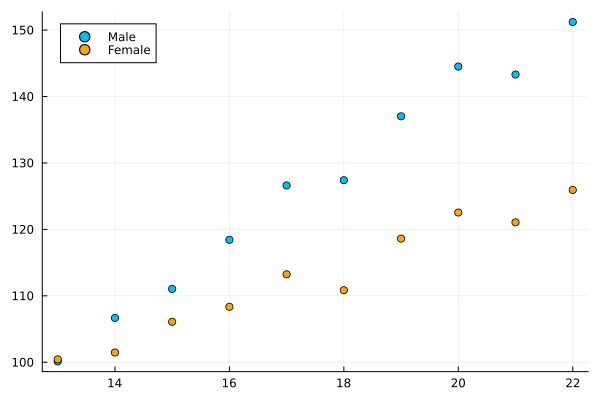

In [6]:
scatter(
    filter(:sex => s -> s == "male", data_growth)[:, :age], 
    filter(:sex => s -> s == "male", data_growth)[:, :weight], 
    markercolor="deepskyblue", 
    label="Male"
)

scatter!(
    filter(:sex => s -> s == "female", data_growth)[:, :age], 
    filter(:sex => s -> s == "female", data_growth)[:, :weight], 
    markercolor="orange", 
    label="Female"
)

In [35]:
hand_OLS(filter(:sex => s -> s == "male", data_growth)[:, :age], filter(:sex => s -> s == "male", data_growth)[:, :weight])

mean x: 17.5, mean y: 126.63188537211597
Covariance of x and y: 47.01318332067376 
Variance of x: 8.25